In [1]:
import re
from collections import Counter

import numpy as np
import pandas as pd

import matplotlib, matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KernelDensity

from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import ExtraTreesClassifier as ETC
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import ExtraTreesRegressor as ETR

# from xgboost.sklearn import XGBClassifier as XGBC

# from bayes_opt import BayesianOptimization
import scipy
from scipy import stats
import statsmodels.api as sm

from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA, MiniBatchSparsePCA
from sklearn.manifold import TSNE
import sweetviz as sv
from sklearn.decomposition import KernelPCA

In [41]:
df = pd.read_csv("CHES2019_experts.csv")

In [42]:
df.head(20)

,id,party,party_name,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,...,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
0,1,1,GERB,2010,7.0,9.0,1.0,NaN,5,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,BSP,2003,5.0,6.0,4.0,NaN,3,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,DPS,2004,7.0,9.0,2.0,NaN,5,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,Volya,2017,3.0,6.0,4.0,NaN,7,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,NFSB,2014,3.0,6.0,4.0,NaN,7,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,6,Ataka,2007,3.0,6.0,4.0,NaN,3,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,7,BMRO,2005,5.0,6.0,2.0,NaN,4,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,8,DB,2018,7.0,10.0,0.0,NaN,9,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,9,DSB,2008,7.0,10.0,0.0,NaN,9,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,10,Slavi Trifonov,2019,6.0,9.0,1.0,NaN,5,NaN,...,1948.0,9.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.columns

Index(['id', 'party', 'party_name', 'party_id', 'position', 'eu_salience',
       'eu_dissent', 'eu_blur', 'lrecon', 'lrecon_blur', 'lrecon_dissent',
       'lrecon_salience', 'galtan', 'galtan_blur', 'galtan_dissent',
       'galtan_salience', 'lrgen', 'immigrate_policy', 'immigra_salience',
       'immigrate_dissent', 'multiculturalism', 'multicult_salience',
       'multicult_dissent', 'redistribution', 'redist_salience', 'environment',
       'enviro_salience', 'spendvtax', 'deregulation', 'econ_interven',
       'civlib_laworder', 'sociallifestyle', 'religious_principles',
       'ethnic_minorities', 'nationalism', 'urban_rural', 'protectionism',
       'regions', 'russian_interference', 'anti_islam_rhetoric',
       'people_vs_elite', 'antielite_salience', 'corrupt_salience',
       'members_vs_leadership', 'eu_cohesion', 'eu_foreign', 'eu_intmark',
       'eu_budgets', 'eu_asylum', 'party_a_econ', 'party_b_econ',
       'party_c_econ', 'gender', 'dob', 'lrecon_self', 'galtan_sel

In [44]:
df.describe()

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon_dissent,lrecon_salience,galtan_blur,...,gender,dob,lrecon_self,galtan_self,eu_position_sd,lrecon_sd,galtan_sd,eu_econ_require,eu_political_require,eu_googov_require
count,3823.000000,3823.000000,3823.000000,3561.000000,3523.000000,1499.000000,1802.000000,1520.000000,3523.000000,1642.000000,...,3814.000000,3674.000000,3797.000000,3799.000000,1989.000000,1989.000000,1989.000000,36.000000,43.000000,38.000000
mean,8.643735,5.353387,1864.380068,4.971637,6.085722,2.625751,3.146504,2.960526,6.355095,2.783800,...,1.710016,1972.347033,4.918093,3.326402,0.772500,1.028167,1.420311,4.916667,4.186047,4.552632
std,5.668377,3.102622,1100.263807,1.933308,2.457828,2.217037,2.596855,2.136185,2.253446,2.422755,...,0.477470,12.658841,1.885663,1.808154,0.347610,0.488534,0.607744,1.401530,2.442245,2.344601
min,1.000000,1.000000,102.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1933.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,837.000000,3.000000,4.000000,1.000000,1.000000,1.000000,5.000000,1.000000,...,1.000000,1963.000000,4.000000,2.000000,0.534522,0.690066,0.997249,4.000000,2.000000,2.250000
50%,8.000000,5.000000,2101.000000,6.000000,6.000000,2.000000,3.000000,2.000000,7.000000,2.000000,...,2.000000,1975.000000,5.000000,3.000000,0.707107,0.900337,1.264911,5.000000,5.000000,5.000000
75%,12.000000,8.000000,2804.000000,7.000000,8.000000,4.000000,5.000000,4.000000,8.000000,4.000000,...,2.000000,1982.000000,6.000000,4.000000,0.971825,1.193416,1.772104,6.000000,7.000000,7.000000
max,27.000000,14.000000,4508.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,3.000000,1995.000000,11.000000,11.000000,2.121320,3.535534,3.681518,7.000000,7.000000,7.000000


In [45]:
# dropping >95% missing data columns
df.drop(columns = ["eu_econ_require", "eu_political_require", "eu_googov_require"], inplace=True)

In [46]:
target = df["party_id"]
target.value_counts()

2101    27
2103    27
2109    27
2111    27
2115    27
        ..
4004     2
3802     2
3804     2
3806     2
4009     2
Name: party_id, Length: 277, dtype: int64

In [47]:
#dropping categorical cols as we have the party_id
df.drop(columns="party_name", inplace=True)
df

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,...,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self,cname,eu_position_sd,lrecon_sd,galtan_sd
0,1,1,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
1,1,2,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
2,1,3,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
3,1,4,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
4,1,5,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,...,9,6.0,1.0,1948.0,9.0,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,17,8,1110,1.0,8.0,NaN,1.0,.d,NaN,NaN,...,9,5.0,2.0,1976.0,5.0,3.0,uk,1.087811,1.964971,1.192928
3819,4,8,1110,1.0,10.0,0.0,NaN,8,1,NaN,...,10,7.0,2.0,1959.0,6.0,3.0,uk,1.087811,1.964971,1.192928
3820,11,8,1110,NaN,NaN,NaN,NaN,.d,.d,NaN,...,9,5.0,1.0,1990.0,3.0,2.0,uk,1.087811,1.964971,1.192928
3821,16,8,1110,2.0,5.0,NaN,3.0,8,.d,NaN,...,8,5.0,1.0,1977.0,5.0,3.0,uk,1.087811,1.964971,1.192928


In [48]:
#dropping cname, eu_position_sd, lrecon_sd, galtan_sd > 50% values missing
df.drop(columns=["cname", "eu_position_sd", "lrecon_sd", "galtan_sd"], inplace=True)
df.head()

,id,party,party_id,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,...,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,gender,dob,lrecon_self,galtan_self
0,1,1,2010,7.0,9.0,1.0,NaN,5,NaN,1.0,...,7.0,7.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0
1,1,2,2003,5.0,6.0,4.0,NaN,3,NaN,5.0,...,3.0,3.0,4.0,3.0,9,6.0,1.0,1948.0,9.0,3.0
2,1,3,2004,7.0,9.0,2.0,NaN,5,NaN,1.0,...,7.0,7.0,6.0,3.0,9,6.0,1.0,1948.0,9.0,3.0
3,1,4,2017,3.0,6.0,4.0,NaN,7,NaN,5.0,...,7.0,4.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0
4,1,5,2014,3.0,6.0,4.0,NaN,7,NaN,5.0,...,7.0,5.0,3.0,3.0,9,6.0,1.0,1948.0,9.0,3.0


In [49]:
df["lrecon_blur"].loc[df["lrecon_blur"] == ".d"] = df["lrecon_blur"].mode()
df["lrecon_blur"].value_counts()

/Users/stuti/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


2     263
3     249
1     247
4     212
0     187
5     181
6     146
7     143
8      90
9      29
10     29
Name: lrecon_blur, dtype: int64

In [50]:
df["lrecon"].loc[df["lrecon"] == ".d"] = df["lrecon"].mode()
df["lrecon"].value_counts()

5     502
4     462
7     458
3     436
6     416
8     379
2     353
1     206
9     171
0      96
10     75
Name: lrecon, dtype: int64

In [51]:
#replacing all the columns that have value ".d" with mode (most frequent value)
for col in df.columns:
    df[col].loc[df[col] == ".d"] = df[col].mode()

In [52]:
df.galtan.value_counts()

5     381
2     374
3     353
10    349
9     330
1     325
8     318
4     315
6     308
7     301
0     242
Name: galtan, dtype: int64

In [53]:
categorical_df = df.select_dtypes(include=["object"])

In [54]:
categorical_df.columns

Index(['lrecon', 'lrecon_blur', 'galtan', 'anti_islam_rhetoric',
       'party_b_econ'],
      dtype='object')

In [81]:
features = df.drop(columns=["id", "party", "party_id", "gender", "dob"])
features

,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,...,eu_foreign,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,lrecon_self,galtan_self,dob_bins
0,7.0,9.0,1.0,NaN,5,NaN,1.0,10.0,6,NaN,...,7.0,7.0,7.0,4.0,3.0,9,6.0,9.0,3.0,1
1,5.0,6.0,4.0,NaN,3,NaN,5.0,7.0,9,NaN,...,4.0,3.0,3.0,4.0,3.0,9,6.0,9.0,3.0,1
2,7.0,9.0,2.0,NaN,5,NaN,1.0,9.0,5,NaN,...,6.0,7.0,7.0,6.0,3.0,9,6.0,9.0,3.0,1
3,3.0,6.0,4.0,NaN,7,NaN,5.0,9.0,9,NaN,...,4.0,7.0,4.0,3.0,3.0,9,6.0,9.0,3.0,1
4,3.0,6.0,4.0,NaN,7,NaN,5.0,5.0,9,NaN,...,5.0,7.0,5.0,3.0,3.0,9,6.0,9.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,1.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,8,1.0,...,NaN,4.0,2.0,2.0,3.0,9,5.0,5.0,3.0,4
3819,1.0,10.0,0.0,NaN,8,1,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,10,7.0,6.0,3.0,2
3820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,9,5.0,3.0,2.0,5
3821,2.0,5.0,NaN,3.0,8,NaN,NaN,NaN,10,NaN,...,1.0,1.0,1.0,1.0,3.0,8,5.0,5.0,3.0,4


In [83]:
#quantile binning the date of birth column 1930-40: 0, 1940- 1950: 2...1990 - 2000: 6

df["dob_bins"] = pd.cut(x = df["dob"], bins = [1930.0, 1940.0, 1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0], 
                        labels=range(7))


In [86]:
df["dob_bins"]

0       1
1       1
2       1
3       1
4       1
       ..
3818    4
3819    2
3820    5
3821    4
3822    0
Name: dob_bins, Length: 3823, dtype: category
Categories (7, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6]

In [73]:
# filling missing values with mode (most frequent values)
df["gender"].fillna(df["gender"].mode()[0], inplace=True)
df["gender"].value_counts()

2.0    2633
1.0    1148
3.0      42
Name: gender, dtype: int64

In [74]:
df["dob_bins"].fillna(df["dob_bins"].mode()[0], inplace=True)
df["dob_bins"].value_counts()

4    1390
5     998
3     591
2     474
1     238
6      95
0      37
Name: dob_bins, dtype: int64

In [95]:
features = pd.concat([features, df["gender"], df["dob_bins"]], axis = 1)
features

,position,eu_salience,eu_dissent,eu_blur,lrecon,lrecon_blur,lrecon_dissent,lrecon_salience,galtan,galtan_blur,...,eu_intmark,eu_budgets,eu_asylum,party_a_econ,party_b_econ,party_c_econ,lrecon_self,galtan_self,gender,dob_bins
0,7.0,9.0,1.0,NaN,5,NaN,1.0,10.0,6,NaN,...,7.0,7.0,4.0,3.0,9,6.0,9.0,3.0,1.0,1
1,5.0,6.0,4.0,NaN,3,NaN,5.0,7.0,9,NaN,...,3.0,3.0,4.0,3.0,9,6.0,9.0,3.0,1.0,1
2,7.0,9.0,2.0,NaN,5,NaN,1.0,9.0,5,NaN,...,7.0,7.0,6.0,3.0,9,6.0,9.0,3.0,1.0,1
3,3.0,6.0,4.0,NaN,7,NaN,5.0,9.0,9,NaN,...,7.0,4.0,3.0,3.0,9,6.0,9.0,3.0,1.0,1
4,3.0,6.0,4.0,NaN,7,NaN,5.0,5.0,9,NaN,...,7.0,5.0,3.0,3.0,9,6.0,9.0,3.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,1.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,8,1.0,...,4.0,2.0,2.0,3.0,9,5.0,5.0,3.0,2.0,4
3819,1.0,10.0,0.0,NaN,8,1,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,2.0,10,7.0,6.0,3.0,2.0,2
3820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,9,5.0,3.0,2.0,1.0,5
3821,2.0,5.0,NaN,3.0,8,NaN,NaN,NaN,10,NaN,...,1.0,1.0,1.0,3.0,8,5.0,5.0,3.0,1.0,4


In [96]:
features.dtypes

position                  float64
eu_salience               float64
eu_dissent                float64
eu_blur                   float64
lrecon                     object
lrecon_blur                object
lrecon_dissent            float64
lrecon_salience           float64
galtan                     object
galtan_blur               float64
galtan_dissent            float64
galtan_salience           float64
lrgen                     float64
immigrate_policy          float64
immigra_salience          float64
immigrate_dissent         float64
multiculturalism          float64
multicult_salience        float64
multicult_dissent         float64
redistribution            float64
redist_salience           float64
environment               float64
enviro_salience           float64
spendvtax                 float64
deregulation              float64
econ_interven             float64
civlib_laworder           float64
sociallifestyle           float64
religious_principles      float64
ethnic_minorit

In [103]:
#imputing with mode
for column in features.columns:
    if features[column].dtype == "object" or features[column].dtype == 'int64':
        features[column].fillna(features[column].mode()[0], inplace=True)
    elif features[column].dtype == "float64":
        features[column].fillna(features[column].median(), inplace=True)

In [99]:
#imputing missing values using kNN
knnimputer = KNNImputer(n_neighbors=5, weights="uniform")

In [107]:
features["dob_bins"].fillna(features["dob_bins"].mode()[0], inplace=True)
features["dob_bins"].value_counts()

4    1390
5     998
3     591
2     474
1     238
6      95
0      37
Name: dob_bins, dtype: int64

In [ ]:
# Feature ranking:
# (1, 'galtan_sd', 0.0726804467340246)
# (2, 'lrecon_sd', 0.07219482482231694)
# (3, 'eu_position_sd', 0.06940048972895829)
# (4, 'regions', 0.02439542383055813)
# (5, 'lrgen', 0.022780840251347002)
# (6, 'religious_principles', 0.021911204822747853)
# (7, 'corrupt_salience', 0.021908408301509995)
# (8, 'urban_rural', 0.021156329636647576)
# (9, 'enviro_salience', 0.01936934537842865)
# (10, 'people_vs_elite', 0.019089147010762114)
# (11, 'econ_interven', 0.018986711602555096)
# (12, 'spendvtax', 0.01884031233386642)
# (13, 'galtan_dissent', 0.018717041679848088)
# (14, 'position', 0.018312978568030085)
# (15, 'russian_interference', 0.018287378592297614)
# (16, 'eu_dissent', 0.01815512361950666)
# (17, 'ethnic_minorities', 0.018104201832846775)
# (18, 'eu_salience', 0.018093895386288215)
# (19, 'members_vs_leadership', 0.01792792341107031)
# (20, 'lrecon_dissent', 0.017904303094582994)
# (21, 'antielite_salience', 0.017846194757881698)
# (22, 'deregulation', 0.017744005290770085)
# (23, 'environment', 0.01774041350256306)
# (24, 'protectionism', 0.01752455460981324)
# (25, 'lrecon_salience', 0.01747819987556844)
# (26, 'redistribution', 0.01741286397913322)
# (27, 'sociallifestyle', 0.017314681543238997)
# (28, 'galtan_blur', 0.017112854557590845)
# (29, 'eu_blur', 0.016985050712527153)
# (30, 'eu_budgets', 0.016753031336459355)

feat_col_imp = ["galtan_sd", "lrecon_sd", 'eu_position_sd', "regions", "lrgen", 'religious_principles'
                ,'corrupt_salience', 'urban_rural', 'enviro_salience', 'people_vs_elite', 'econ_interven',
               'spendvtax', 'galtan_dissent', 'position', 'russian_interference', 'eu_dissent', 'ethnic_minorities',
               'eu_salience', 'members_vs_leadership', 'lrecon_dissent', 'antielite_salience', 'deregulation', 
                'environment', 'protectionism', 'lrecon_salience', 'redistribution', 'sociallifestyle', 'galtan_blur',
               'eu_blur', 'eu_budgets']

In [116]:
#scaling using standard scalar
data_scaler = preprocessing.StandardScaler()
data_scaler.fit(features)

StandardScaler()

In [117]:
scaled_data_frame = data_scaler.transform(features)
scaled_data_frame

array([[ 1.03942282,  1.23813358, -0.87637798, ..., -0.17995428,
        -1.48977186, -2.10419409],
       [-0.02235766, -0.03348405,  1.23477074, ..., -0.17995428,
        -1.48977186, -2.10419409],
       [ 1.03942282,  1.23813358, -0.17266174, ..., -0.17995428,
        -1.48977186, -2.10419409],
       ...,
       [ 0.50853258, -0.03348405, -0.17266174, ..., -0.73476495,
        -1.48977186,  1.03322167],
       [-1.61502838, -0.45735659, -0.17266174, ..., -0.17995428,
        -1.48977186,  0.24886773],
       [-1.61502838,  1.66200612,  3.34591947, ...,  0.37485638,
         0.60643639, -2.88854803]])

In [244]:
pca_2 = PCA(n_components=2).fit(scaled_data_frame)
df_pca_2 = pca_2.fit_transform(scaled_data_frame)

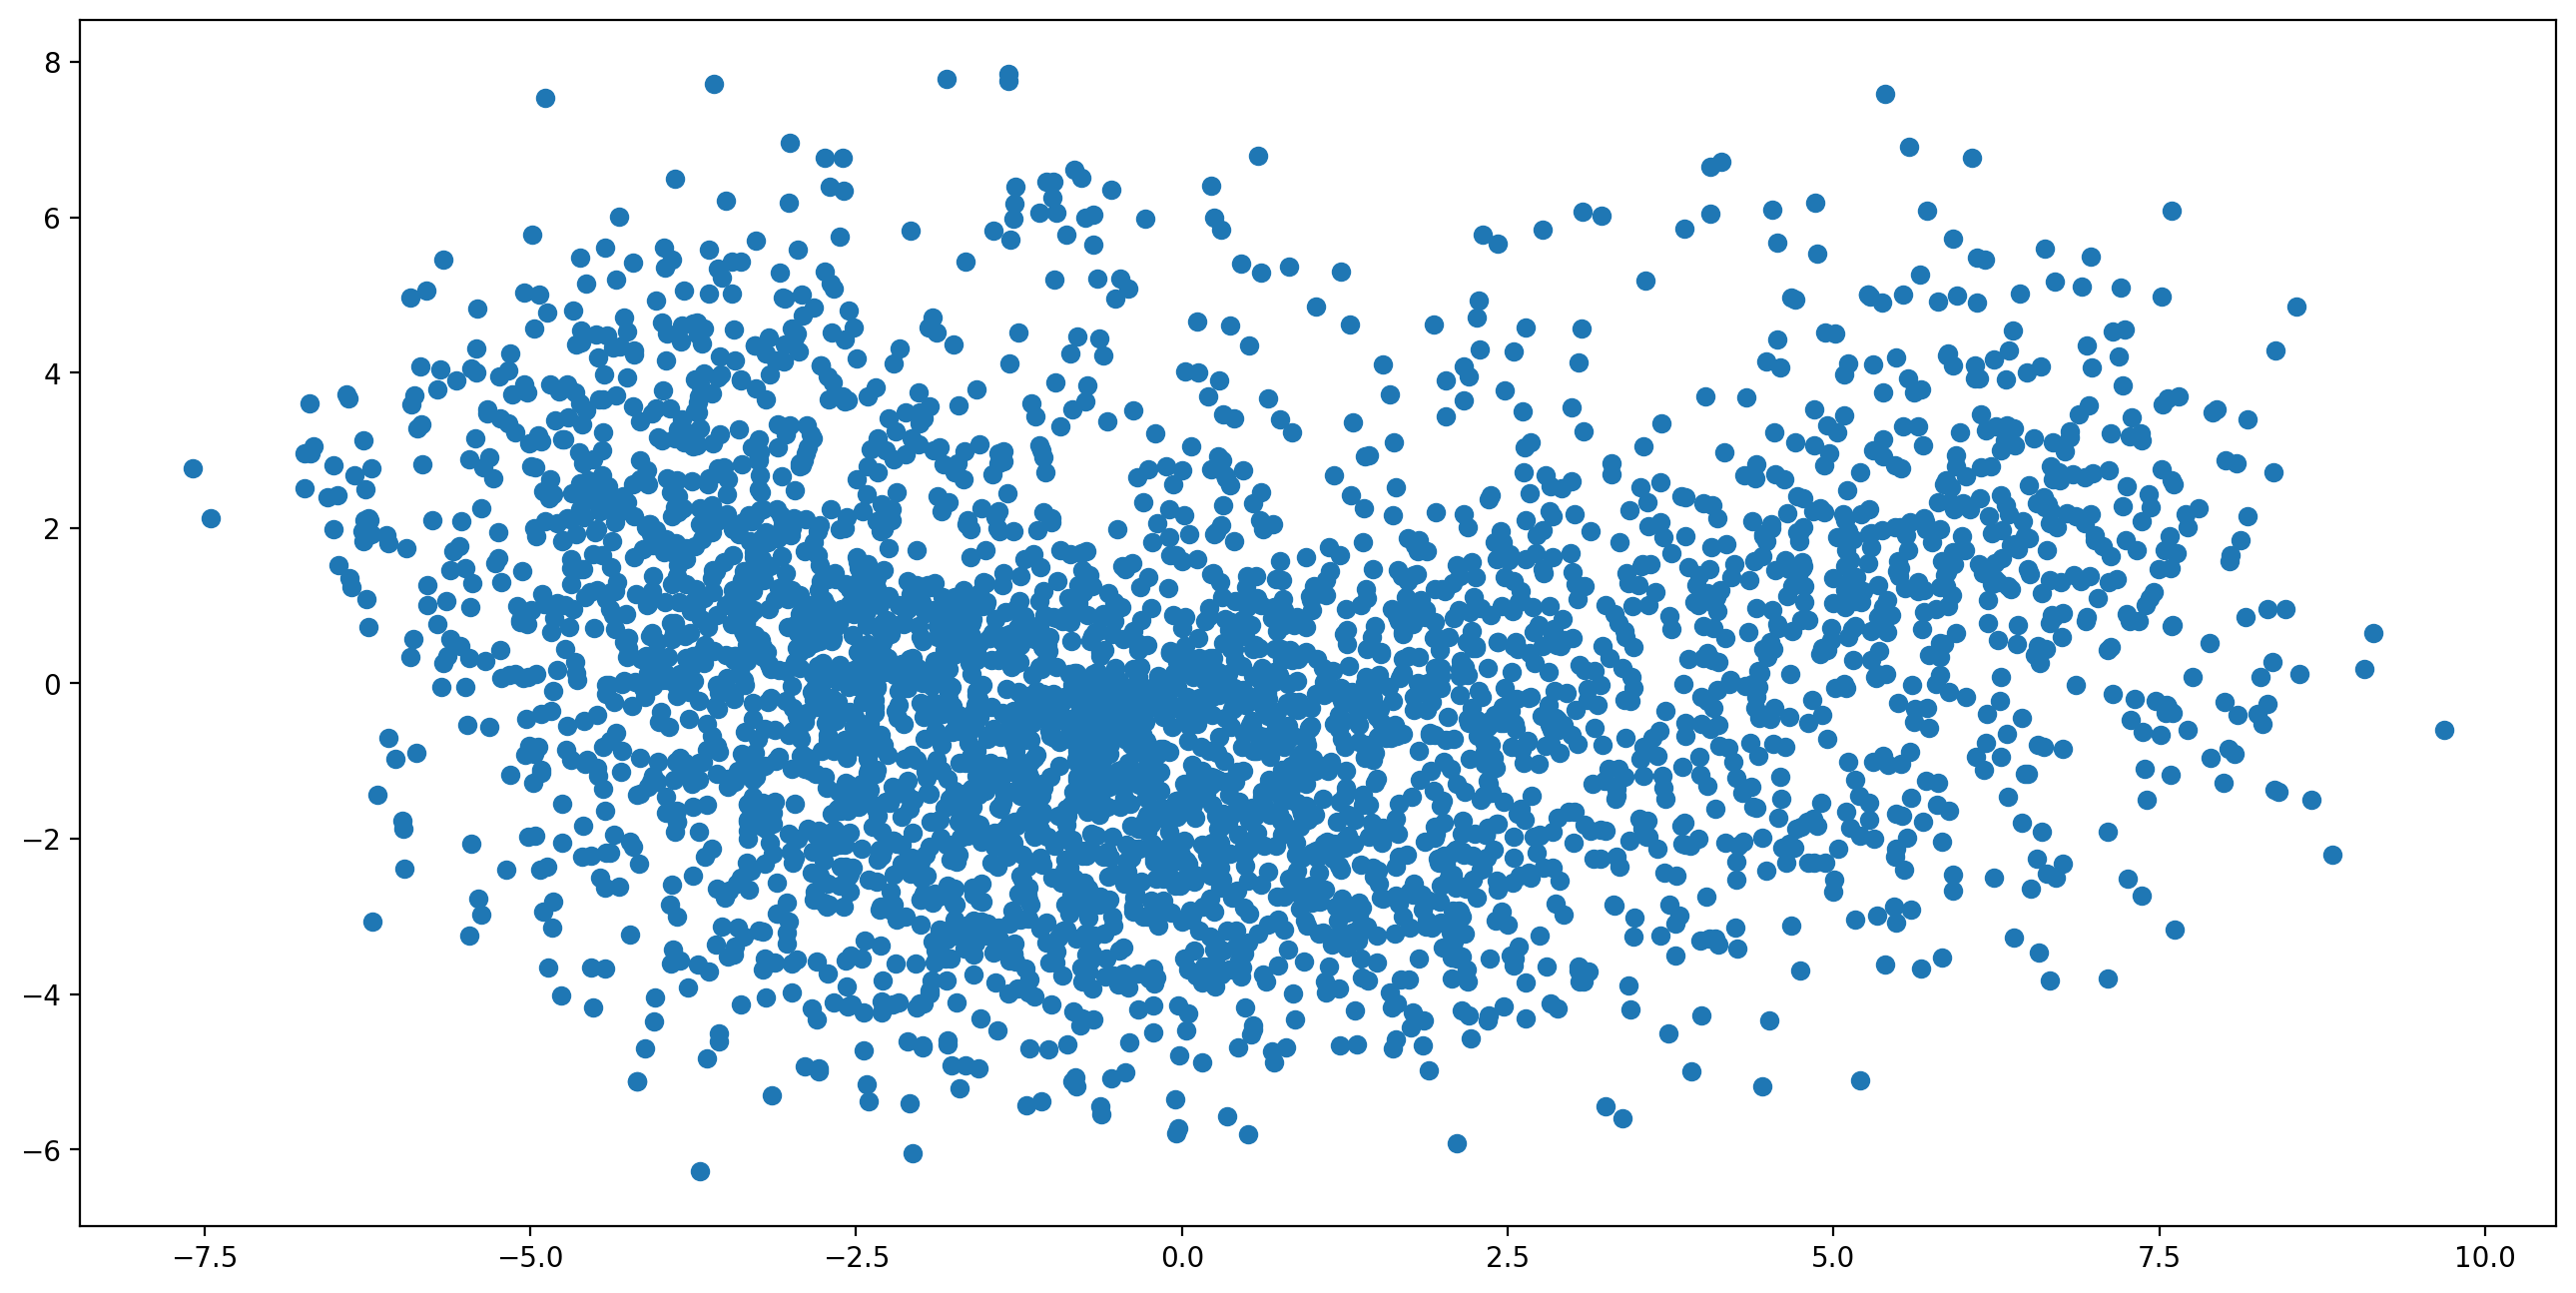

In [245]:
plt.figure(figsize = (16,8))
plt.scatter(df_pca_2[:, 0], df_pca_2[:, 1]) #c = target)

In [246]:
n_pcs = pca_2.components_.shape[0]

In [248]:
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca_2.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = features.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
pc_df = pd.DataFrame(dic.items())

In [249]:
pc_df

,0,1
0,PC0,nationalism
1,PC1,deregulation


In [120]:
print(df_pca_2.shape)
print(scaled_data_frame.shape)

(3823, 2)
(3823, 52)


In [121]:
tsne = TSNE(n_components=2)

X_embedded = tsne.fit_transform(scaled_data_frame)
X_embedded.shape

(3823, 2)

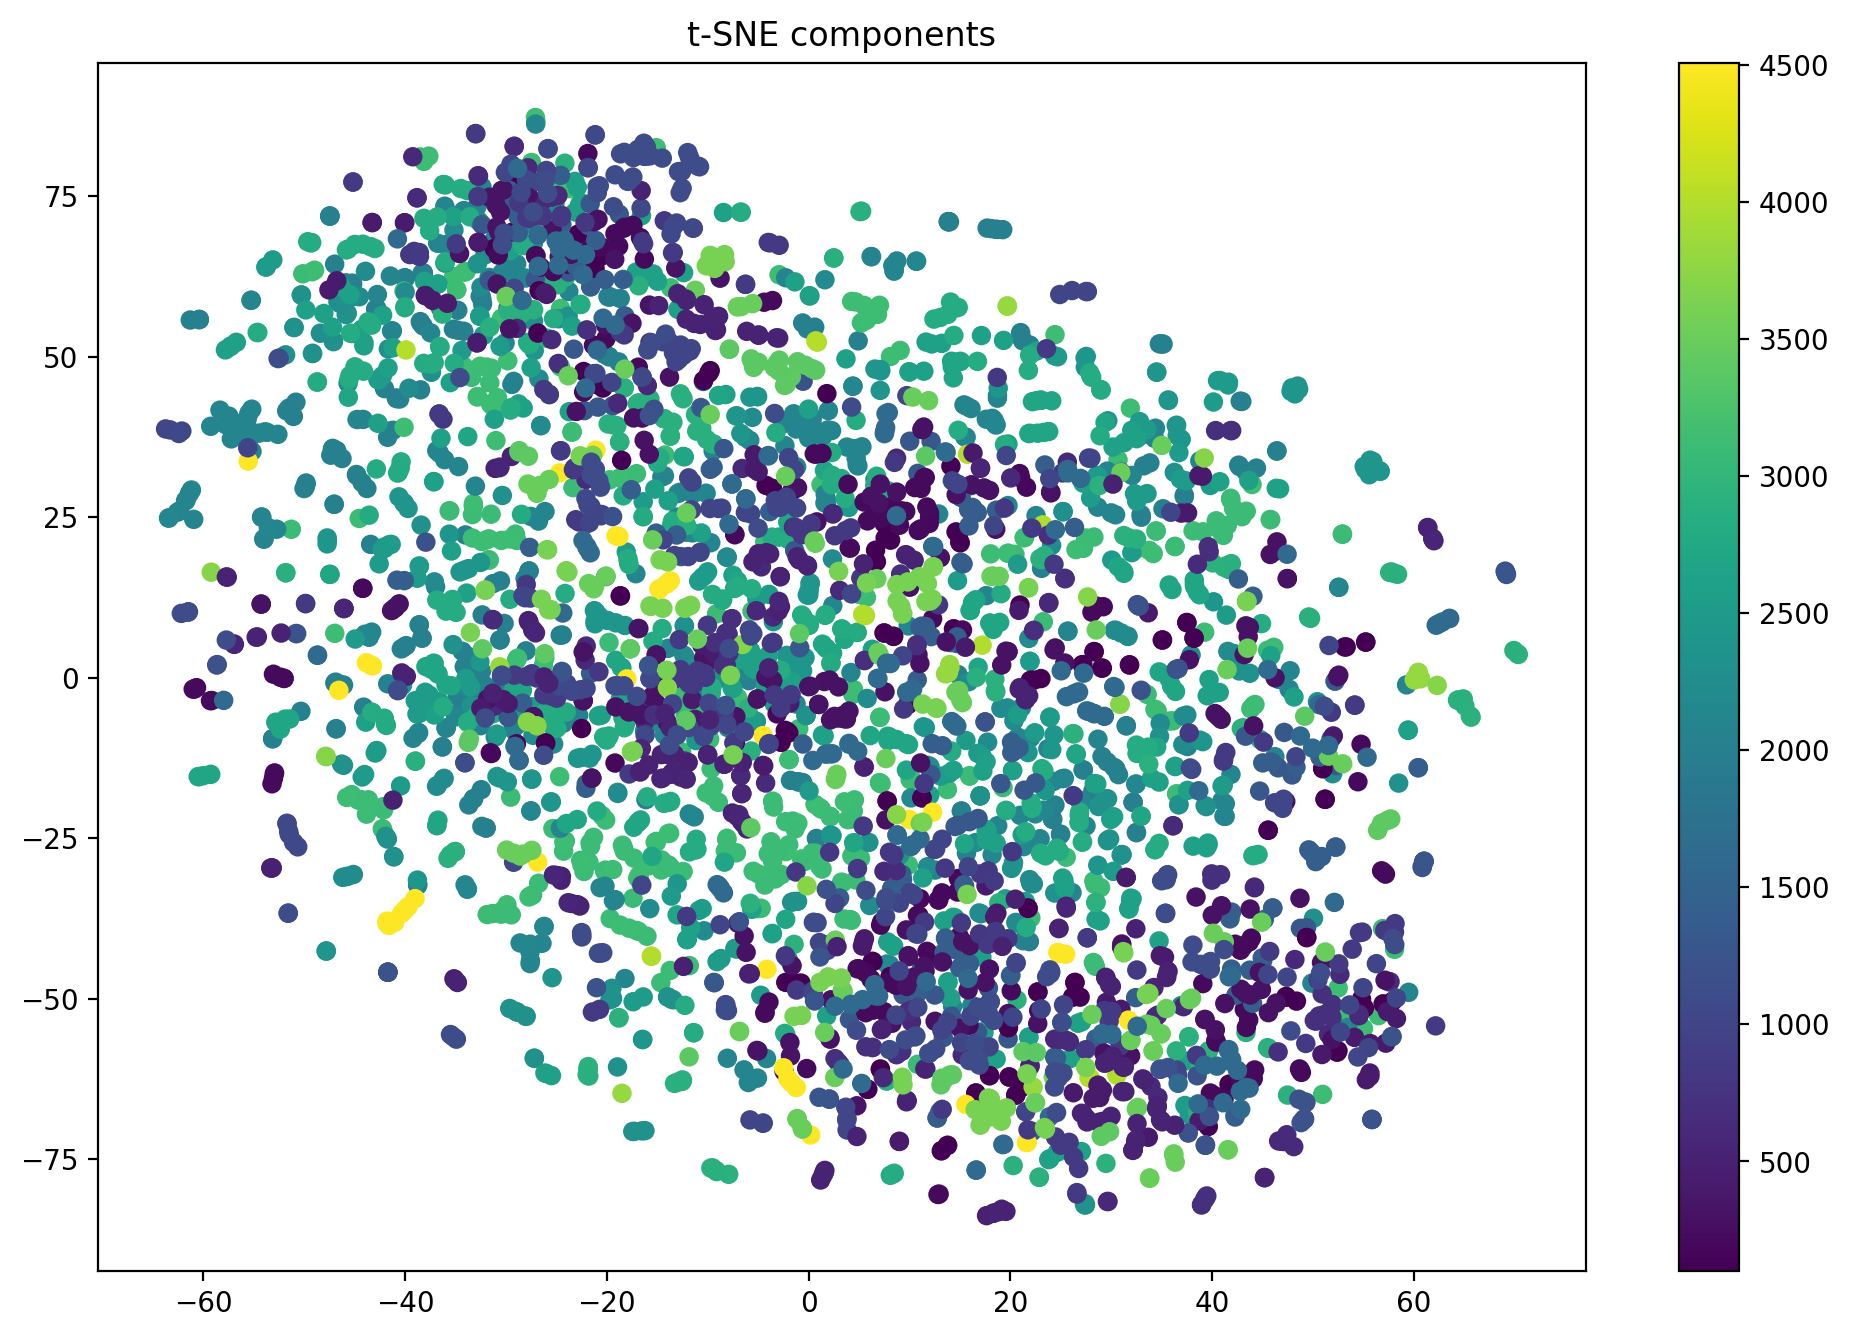

In [141]:
plt.figure(figsize=(12,8))
plt.title('t-SNE components')
plt.scatter(X_embedded[:,0], X_embedded[:,1], c = target)
plt.colorbar()

In [123]:
pca_2.explained_variance_ratio_

array([0.21268321, 0.10649313])

In [124]:
# trying to do feature importance using RF classifier
# pick some features based on feature importances indicated by an unparameterized (to avoid overfitting) 
# and hence, sub-optimal random forest 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier().fit(features,target)

In [125]:
# print importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
# Print the feature ranking
print("Feature ranking:")
for f in range(features.shape[1]):
    print( (f + 1, features.columns[indices[f]], importances[indices[f]]))

Feature ranking:
(1, 'regions', 0.028881288542486692)
(2, 'corrupt_salience', 0.02725927670947329)
(3, 'eu_salience', 0.026352006917157757)
(4, 'people_vs_elite', 0.02569332853870989)
(5, 'lrgen', 0.02515476209187869)
(6, 'urban_rural', 0.02502560238921061)
(7, 'religious_principles', 0.02404100233535857)
(8, 'antielite_salience', 0.023998997994743386)
(9, 'position', 0.023463816031365225)
(10, 'members_vs_leadership', 0.023408958573403856)
(11, 'enviro_salience', 0.023324417131816225)
(12, 'lrecon', 0.022936364692605977)
(13, 'lrecon_salience', 0.02286407643937016)
(14, 'galtan', 0.022248755371636474)
(15, 'russian_interference', 0.022115948400005938)
(16, 'lrecon_self', 0.021859329634703585)
(17, 'ethnic_minorities', 0.021691892415924112)
(18, 'immigra_salience', 0.021482611030179514)
(19, 'sociallifestyle', 0.02130051319735412)
(20, 'econ_interven', 0.02092185197445319)
(21, 'galtan_salience', 0.020889297951474234)
(22, 'nationalism', 0.02075683473657313)
(23, 'redistribution', 0.02

52

# Part II Fitting a distribution

### Kernel Density Estimation 2D
###### For estimating a distribution of the 2D points from the dimensionality reduction you need to see the probability distribution of those points

In [177]:
def kde2D(x, y, bandwidth, xbins=128j, ybins=128j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[x.min():x.max():xbins, 
                      y.min():y.max():ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)
    
    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [127]:
# use grid search cross-validation to optimize the bandwidth
params = {'bandwidth': np.logspace(-1, 1, 20)}
grid = GridSearchCV(KernelDensity(), params)
grid.fit(df_pca_2)

GridSearchCV(estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.1274275 ,  0.16237767,  0.20691381,  0.26366509,
        0.33598183,  0.42813324,  0.54555948,  0.6951928 ,  0.88586679,
        1.12883789,  1.43844989,  1.83298071,  2.33572147,  2.97635144,
        3.79269019,  4.83293024,  6.15848211,  7.8475997 , 10.        ])})

In [128]:
print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))

best bandwidth: 0.5455594781168519


In [222]:
x_ax, y_ax = df_pca_2[:,1] + df_pca_2[:,0], df_pca_2[:,0] - df_pca_2[:,1]
xx, yy, zz = kde2D(x_ax, y_ax, grid.best_estimator_.bandwidth)

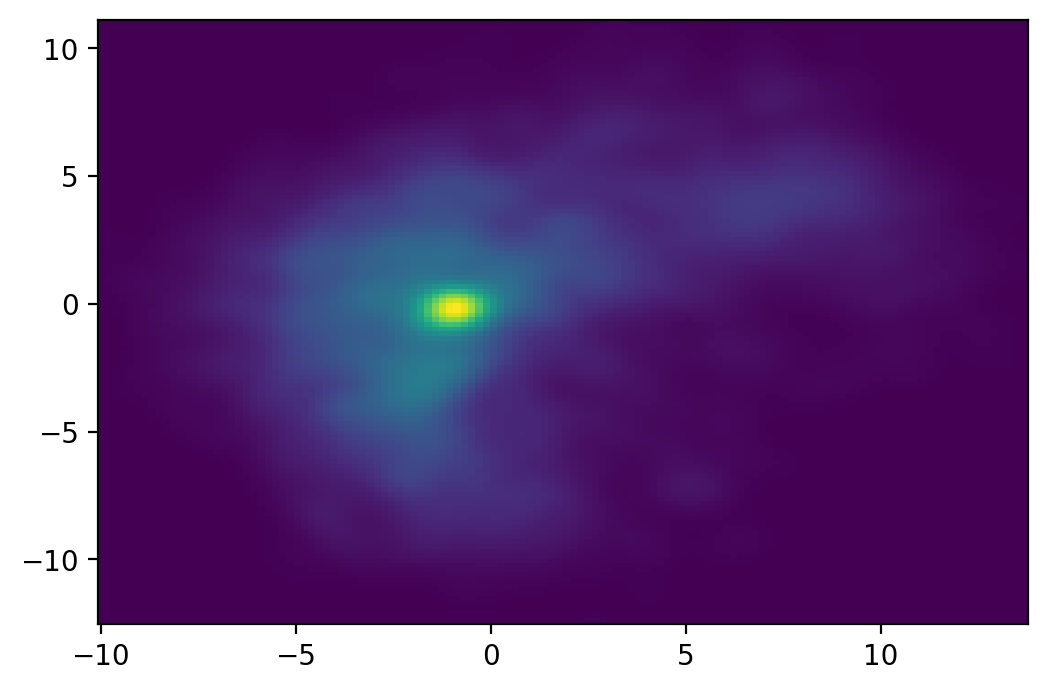

In [239]:
plt.pcolormesh(xx, yy, zz, shading="auto")
# plt.scatter(x_ax, y_ax, s=2, facecolor='white')

In [220]:
kde = grid.best_estimator_

In [221]:
kde

KernelDensity(bandwidth=0.5455594781168519)

In [139]:
plt.rcParams['figure.dpi'] = 200

### Fitting and contouring a Gaussian Kernel Density Estimation

In [173]:
# Extract x and y
xaxis = df_pca_2[:, 0]
yaxis = df_pca_2[:, 1]
# Define the borders
deltaX = (max(xaxis) - min(xaxis))/10
deltaY = (max(yaxis) - min(yaxis))/10
xmin = min(xaxis) - deltaX
xmax = max(xaxis) + deltaX
ymin = min(yaxis) - deltaY
ymax = max(yaxis) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
x_x, y_y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-9.317797238424317 11.410783284561187 -7.687645037259295 9.250567308043658


In [189]:
positions = np.vstack([x_x.ravel(), y_y.ravel()])
values = np.vstack([xaxis, yaxis])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, x_x.shape)

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

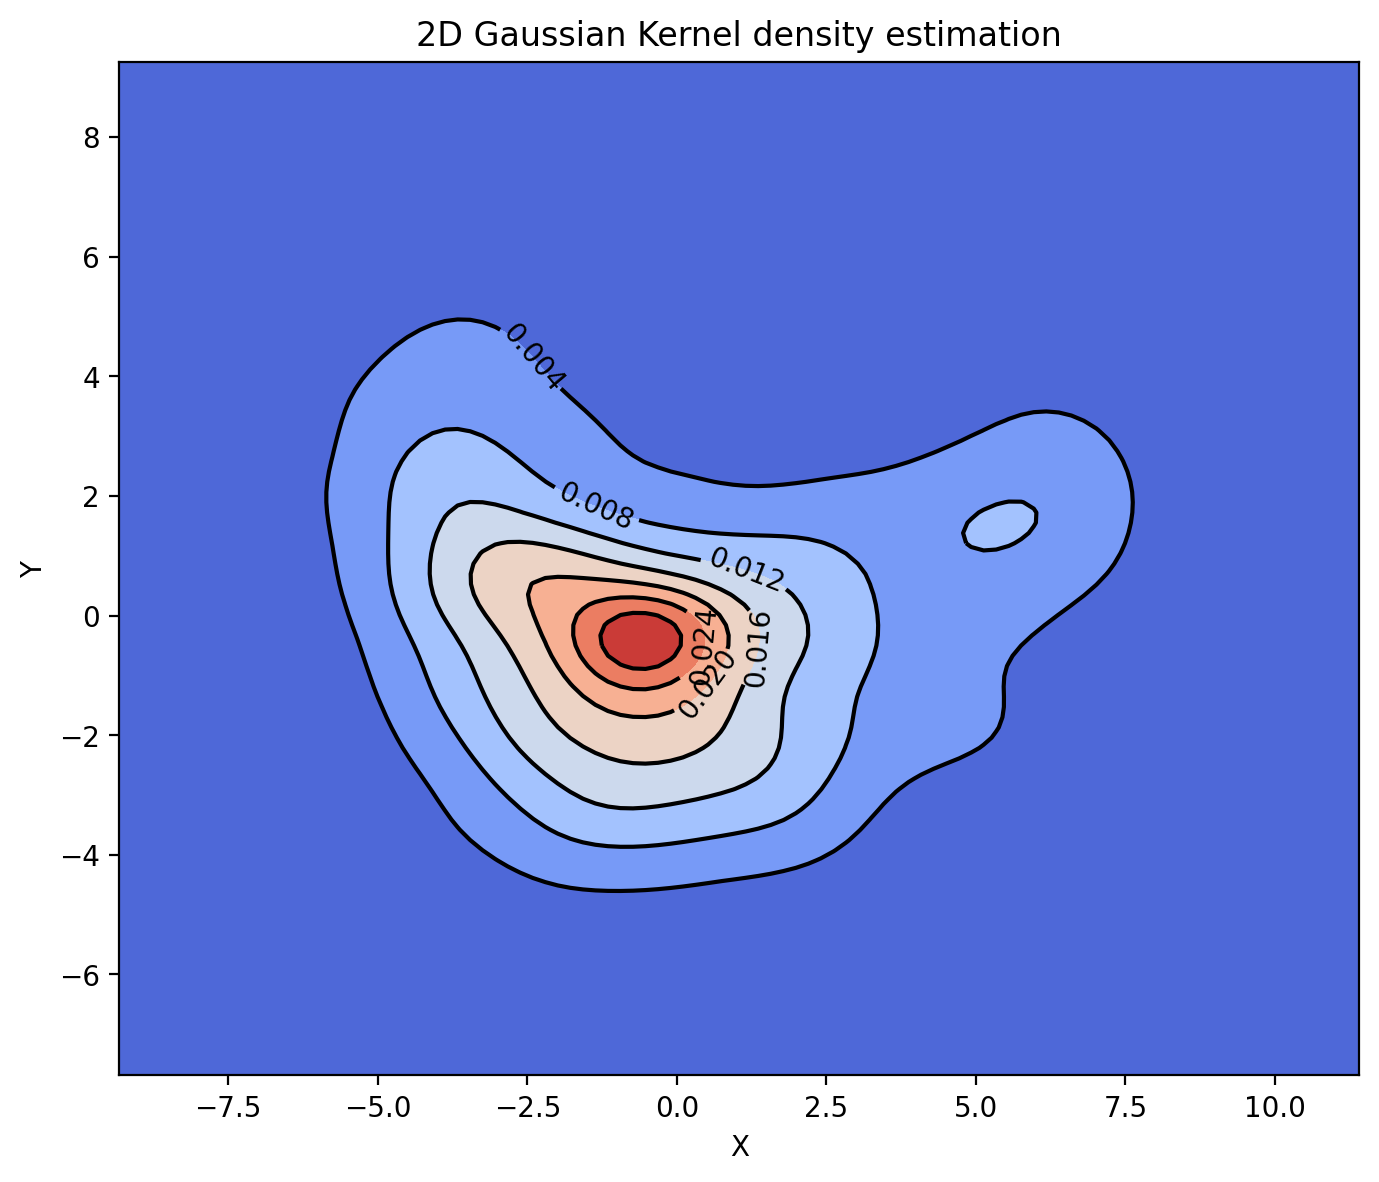

In [190]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(x_x, y_y, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(x_x, y_y, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

# Part III Random Sampling 

In [230]:
#sampling using kde
z = kde.fit(df_pca_2)
sampled_data = z.sample(10, random_state=0)
sampled_data = pca_2.inverse_transform(sampled_data)

In [237]:
np.mean(sampled_data[0])

0.11730341589833251

In [233]:
#vizualizing the sampled data
x_axis, y_axis = z.sample(10, random_state=0)[:,1] + z.sample(10, random_state=0)[:,0], z.sample(10, random_state=0)[:,0] - z.sample(10, random_state=0)[:,1]
xx_1, yy_1, zz_1 = kde2D(x_ax, y_ax, grid.best_estimator_.bandwidth)

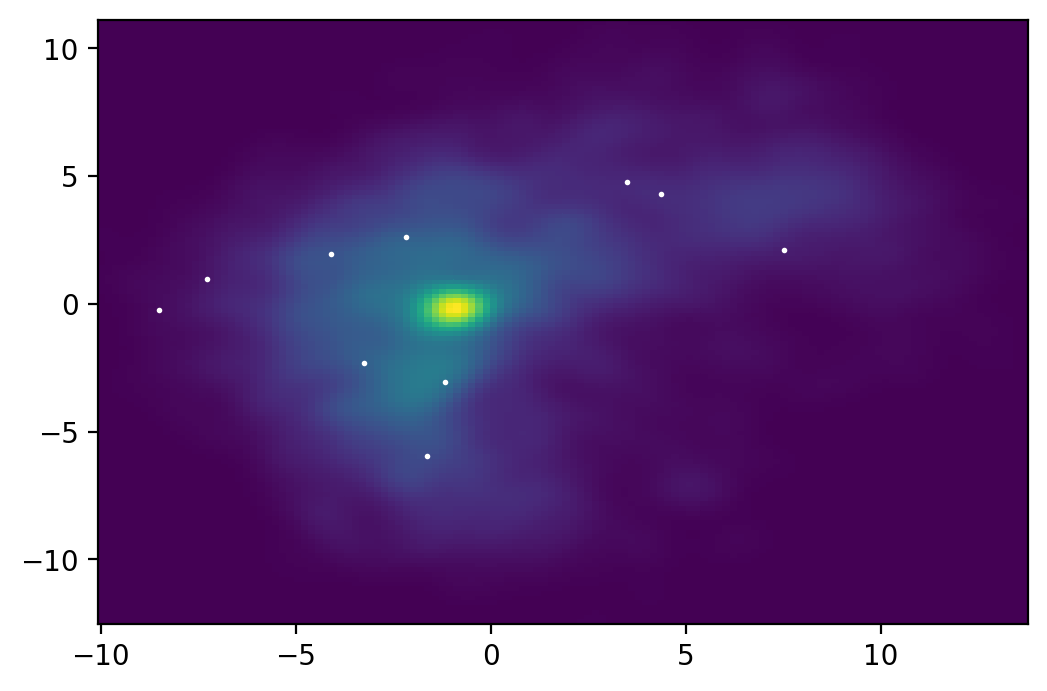

In [242]:
plt.pcolormesh(xx_1, yy_1, zz_1, shading="auto")
plt.scatter(x_axis, y_axis, s=1,facecolor='white')